In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [6]:
duplicates = df.duplicated()
duplicates.count

<bound method Series.count of 0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool>

In [7]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

<Axes: xlabel='Sales_in_thousands'>

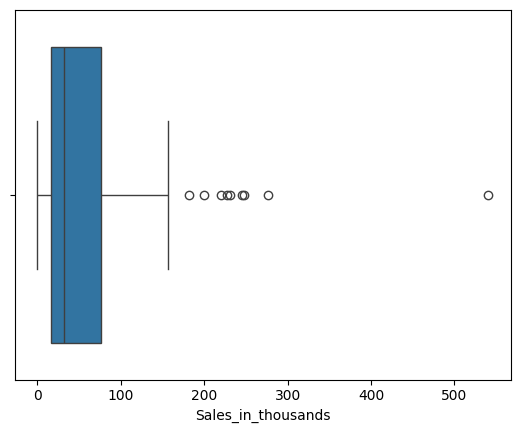

In [10]:
sns.boxplot(x=df['Sales_in_thousands'])

In [11]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Sales_in_thousands     59.262000
__year_resale_value     8.635000
Price_in_thousands     12.485000
Engine_size             1.600000
Horsepower             70.000000
Wheelbase               9.200000
Width                   5.100000
Length                 19.000000
Curb_weight             0.912000
Fuel_capacity           4.500000
Fuel_efficiency         4.000000
Power_perf_factor      30.531292
dtype: float64


In [ ]:
df, Q1 = df.align(Q1, axis=1, copy=False)
df, Q3 = df.align(Q3, axis=1, copy=False)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
IQR

Sales_in_thousands     59.262000
__year_resale_value     8.635000
Price_in_thousands     12.485000
Engine_size             1.600000
Horsepower             70.000000
Wheelbase               9.200000
Width                   5.100000
Length                 19.000000
Curb_weight             0.912000
Fuel_capacity           4.500000
Fuel_efficiency         4.000000
Power_perf_factor      30.531292
dtype: float64

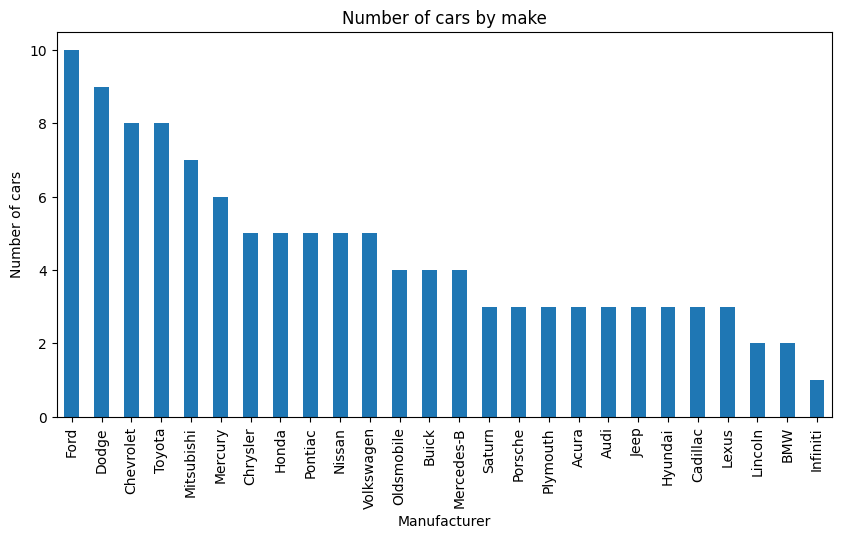

In [ ]:
df.Manufacturer.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Manufacturer")
plt.ylabel('Number of cars')
plt.xlabel('Manufacturer')
plt.show()

In [22]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


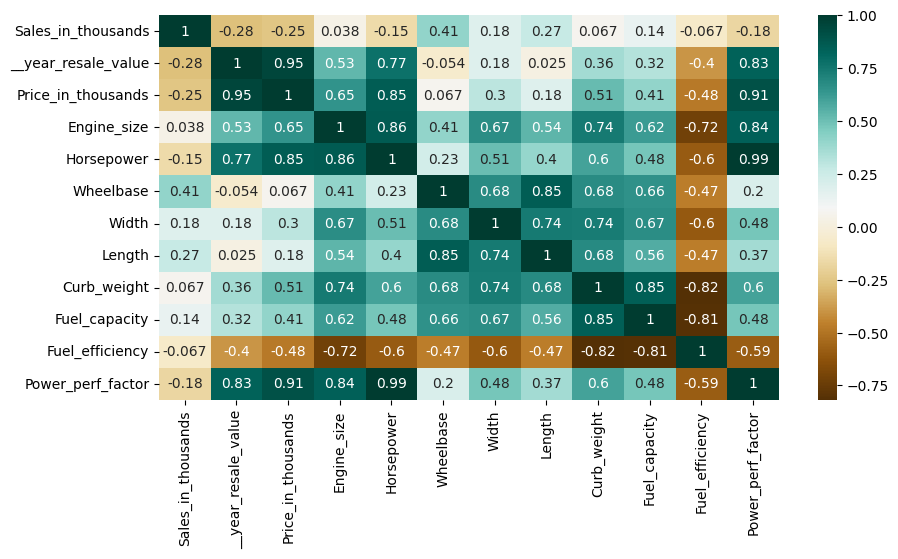

In [28]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,5))
c = numeric_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

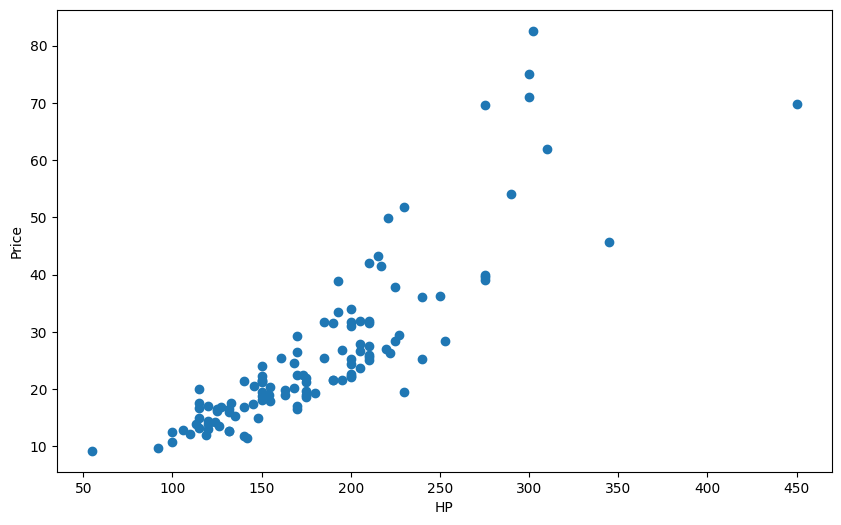

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Horsepower'], df['Price_in_thousands'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()